# Credit Card Default Classification

In this work, I will try to estimate the probability of default using data set from 
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

### importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, precision_score, recall_score

### Importing the data

In [2]:
df = pd.read_excel('default of credit card clients.xls', header=1)

### Glimpse of the data set

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dimensions of the data

In [4]:
df.shape

(30000, 25)

The dataset contains 30000 records on 24 variables, including theb mount of given credit, history of payment and bill statements of credit card customers from April 2005 to September 2005. The data is publicly available at UCI Machine Learning Repository:  https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

### Column names to look at the predictor and target variables

In [5]:
df.columns  

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Where these features refer to:
<table style="display: inline-block">
<tr><th>Feature</th><th>Description</th></tr>
<tr><td>ID</td><td>	         ID of each clientline</td></tr>
<tr><td>LIMIT_BAL</td><td>	 Amount of given credit in NT dollars (includes individual and family/supplementary credit)</td></tr>
<tr><td>SEX	Gender</td><td>   (1=male, 2=female)</td></tr>
<tr><td>EDUCATION</td><td>	 (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)</td></tr>
<tr><td>MARRIAGE</td><td>	 Marital status (1=married, 2=single, 3=others)</td></tr>
<tr><td>AGE</td><td>	         Age in years</td></tr>
<tr><td>PAY_0</td><td>	     Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment                delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for                nine months and above)</td></tr>
<tr><td>PAY_2</td><td>	     Repayment status in August, 2005 (scale same as above)</td></tr>
<tr><td>PAY_3</td><td>	     Repayment status in July, 2005 (scale same as above)</td></tr>
<tr><td>PAY_4</td><td>	     Repayment status in June, 2005 (scale same as above)</td></tr>
<tr><td>PAY_5</td><td>	     Repayment status in May, 2005 (scale same as above)</td></tr>
<tr><td>PAY_6</td><td>	     Repayment status in April, 2005 (scale same as above)</td></tr>
<tr><td>BILL_AMT1</td><td>	 Amount of bill statement in September, 2005 (NT dollar)</td></tr>
<tr><td>BILL_AMT2</td><td>	 Amount of bill statement in August, 2005 (NT dollar)</td></tr>
<tr><td>BILL_AMT3</td><td>	 Amount of bill statement in July, 2005 (NT dollar)</td></tr>
<tr><td>BILL_AMT4</td><td>	 Amount of bill statement in June, 2005 (NT dollar)</td></tr>
<tr><td>BILL_AMT5</td><td>	 Amount of bill statement in May, 2005 (NT dollar)</td></tr>
<tr><td>BILL_AMT6</td><td>	 Amount of bill statement in April, 2005 (NT dollar)</td></tr>
<tr><td>PAY_AMT1</td><td>	 Amount of previous payment in September, 2005 (NT dollar)</td></tr>
<tr><td>PAY_AMT2</td><td>	 Amount of previous payment in August, 2005 (NT dollar)</td></tr>
<tr><td>PAY_AMT3</td><td>	 Amount of previous payment in July, 2005 (NT dollar)</td></tr>
<tr><td>PAY_AMT4</td><td>	 Amount of previous payment in June, 2005 (NT dollar)</td></tr>
<tr><td>PAY_AMT5</td><td>	 Amount of previous payment in May, 2005 (NT dollar)</td></tr>
<tr><td>PAY_AMT6</td><td>	 Amount of previous payment in April, 2005 (NT dollar)</td></tr>
<tr><td>default payment next month</td><td>	Default payment (1=yes, 0=no)</td></tr>
</table>

### Structure of the data and its data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [7]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

Loyal customers as 1 and the others as 0.

Conveniently, 22% of the data have Default Payment Next Month Yes and 78% -> No.

Summary of Default Payment Next Month:
<table style="display: inline-block">
<tr><th>Default Payment Next Month</th><th>Count</th></tr>
<tr><td>No</td><td> 23364</td></tr>
<tr><td>Yes</td><td> 6636</td></tr>
</table>

# Exploratory Data Analysis

## Descriptive Statistics to get a feel of how the data looks in aggregate:
Let's do a simple statistical and visual exploration of the dataset. Here is the statistics of the independent variables across the two classes in the estimation data. 

Such an analysis by class is to have preliminary idea about if the classes are in fact separable and to understand which of the predictors have most discriminatory effect.

### 1. Stats for Class 1 (“Default”)

In [8]:
df[df['default payment next month']==1].drop(['ID', 'default payment next month'], axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,6636.0,130109.656420,115378.540571,10000.0,50000.00,90000.0,200000.00,740000.0
SEX,6636.0,1.567058,0.495520,1.0,1.00,2.0,2.00,2.0
EDUCATION,6636.0,1.894665,0.728096,1.0,1.00,2.0,2.00,6.0
MARRIAGE,6636.0,1.528029,0.525433,0.0,1.00,2.0,2.00,3.0
AGE,6636.0,35.725738,9.693438,21.0,28.00,34.0,42.00,75.0
PAY_0,6636.0,0.668174,1.383252,-2.0,0.00,1.0,2.00,8.0
PAY_2,6636.0,0.458258,1.502243,-2.0,0.00,0.0,2.00,7.0
PAY_3,6636.0,0.362116,1.499401,-2.0,-1.00,0.0,2.00,8.0
PAY_4,6636.0,0.254521,1.508535,-2.0,-1.00,0.0,2.00,8.0
PAY_5,6636.0,0.167872,1.482833,-2.0,-1.00,0.0,0.00,8.0


### 2. Stats for Class 0 ("No Default")

In [9]:
df[df['default payment next month']==0].drop(['ID', 'default payment next month'], axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,23364.0,178099.726074,131628.359660,10000.0,70000.00,150000.0,250000.00,1000000.0
SEX,23364.0,1.614150,0.486806,1.0,1.00,2.0,2.00,2.0
EDUCATION,23364.0,1.841337,0.806780,0.0,1.00,2.0,2.00,6.0
MARRIAGE,23364.0,1.558637,0.520794,0.0,1.00,2.0,2.00,3.0
AGE,23364.0,35.417266,9.077355,21.0,28.00,34.0,41.00,79.0
PAY_0,23364.0,-0.211222,0.952464,-2.0,-1.00,0.0,0.00,8.0
PAY_2,23364.0,-0.301917,1.035191,-2.0,-1.00,0.0,0.00,8.0
PAY_3,23364.0,-0.316256,1.048378,-2.0,-1.00,0.0,0.00,8.0
PAY_4,23364.0,-0.355633,1.013162,-2.0,-1.00,0.0,0.00,8.0
PAY_5,23364.0,-0.389488,0.977591,-2.0,-1.00,0.0,0.00,7.0


### Checking if the columns have missing values

In [10]:
df_na =df.isnull().sum()
print(df_na)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


This shows that we don't have any missing values. This a good news as there is no any missing value that needs to be replaced or removed.

### Distribution of the Classes

In [11]:
import collections
Ncase=collections.Counter(df['default payment next month'])

In [12]:
print(f"Default payment next month -> No case: {Ncase[0]}")
print(f"Default payment next month -> Yes case: {Ncase[1]}")

Default payment next month -> No case: 23364
Default payment next month -> Yes case: 6636


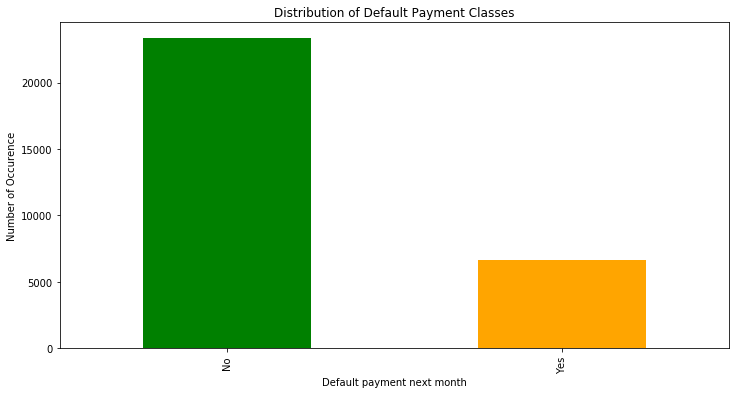

In [13]:
LABELS = ["No", "Yes"]
df_count_labels = pd.value_counts(df['default payment next month'], sort = True)
plt.figure(figsize=(12,6))
df_count_labels.plot(kind = 'bar', color=['g','orange'])
plt.title("Distribution of Default Payment Classes")
plt.xticks(range(2), LABELS)
plt.xlabel('Default payment next month')
plt.ylabel("Number of Occurence");

The above figure shows the distribution of transation class, i.e., 1 or 0 and it reveals unbalaced class with 1 being a minority class.

### Distribution of Sex, Education, Age and Marriage

### Marriage status:
0 : unknown,
1 : married,
2 : single,
3 : others;
###  Sex status:
1 : male,
2 : female;
###  Education status:
1 : graduate school,
2 : university,
3 : high school,
4 : others,
5 : unknown,
6 : unknow

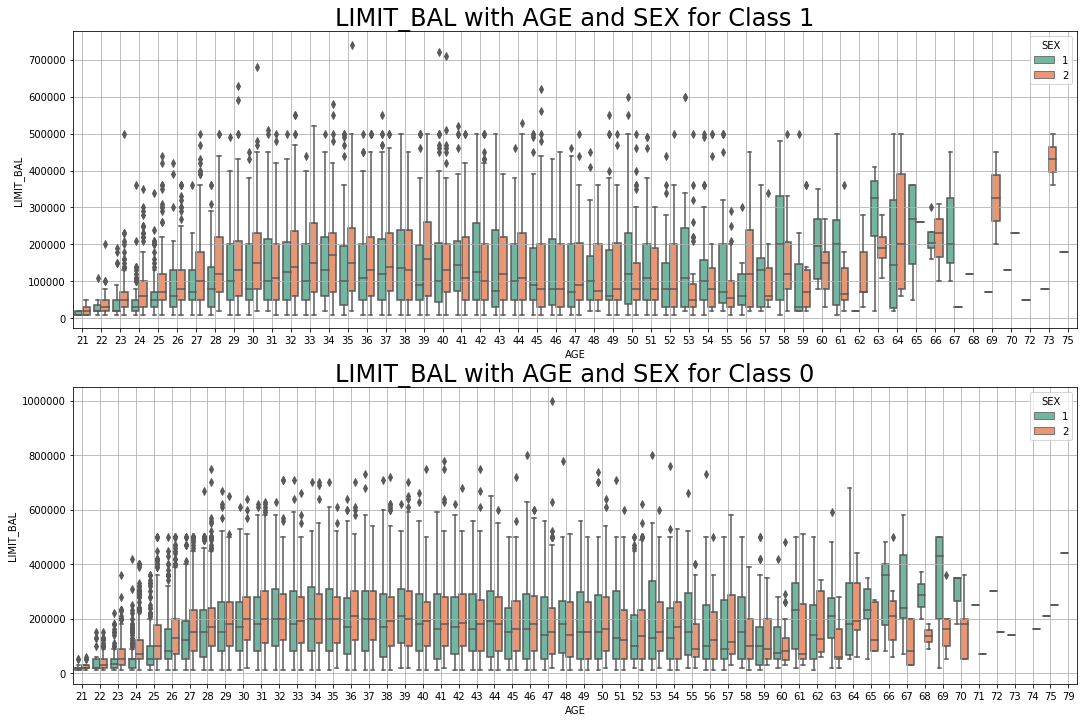

In [14]:
plt.figure(figsize=(18,12))
plt.subplot(2,1,1)
sns.boxplot(x="AGE", y="LIMIT_BAL", hue="SEX",data=df[df['default payment next month']==1], palette="Set2")
plt.title('LIMIT_BAL with AGE and SEX for Class 1', fontsize=24)
plt.grid()
plt.subplot(2,1,2)
sns.boxplot(x="AGE", y="LIMIT_BAL", hue="SEX",data=df[df['default payment next month']==0], palette="Set2")
plt.title('LIMIT_BAL with AGE and SEX for Class 0', fontsize=24)
plt.grid();

The figure shows that while the median of the LIMIT_BAL change barely for Class 0 for the age between 28 and 50, Class 1 changes flactuation in the median.In both classes Femals show higher median LIMIT_BAL.

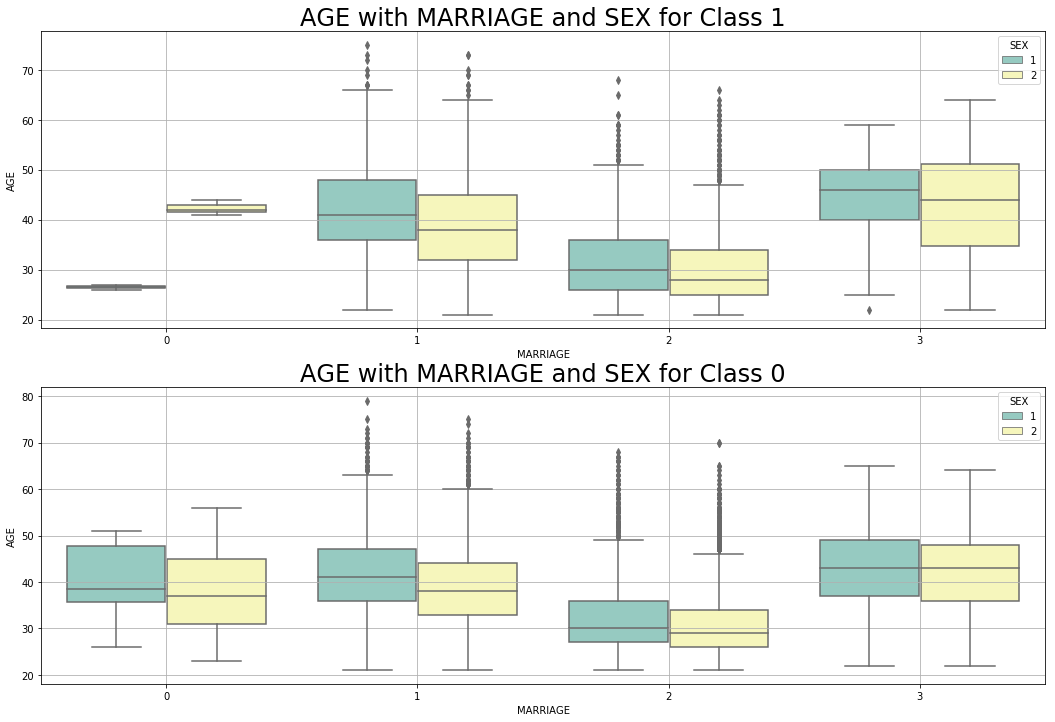

In [15]:
plt.figure(figsize=(18,12))
plt.subplot(2,1,1)
sns.boxplot(x="MARRIAGE", y="AGE", hue="SEX",data=df[df['default payment next month']==1], palette="Set3")
plt.title('AGE with MARRIAGE and SEX for Class 1', fontsize=24)
plt.grid()
plt.subplot(2,1,2)
sns.boxplot(x="MARRIAGE", y="AGE", hue="SEX",data=df[df['default payment next month']==0], palette="Set3")
plt.title('AGE with MARRIAGE and SEX for Class 0', fontsize=24)
plt.grid();

As expected, Single (2) shows is younger than the median age of married. Moreover, in all marriage group females are younger.

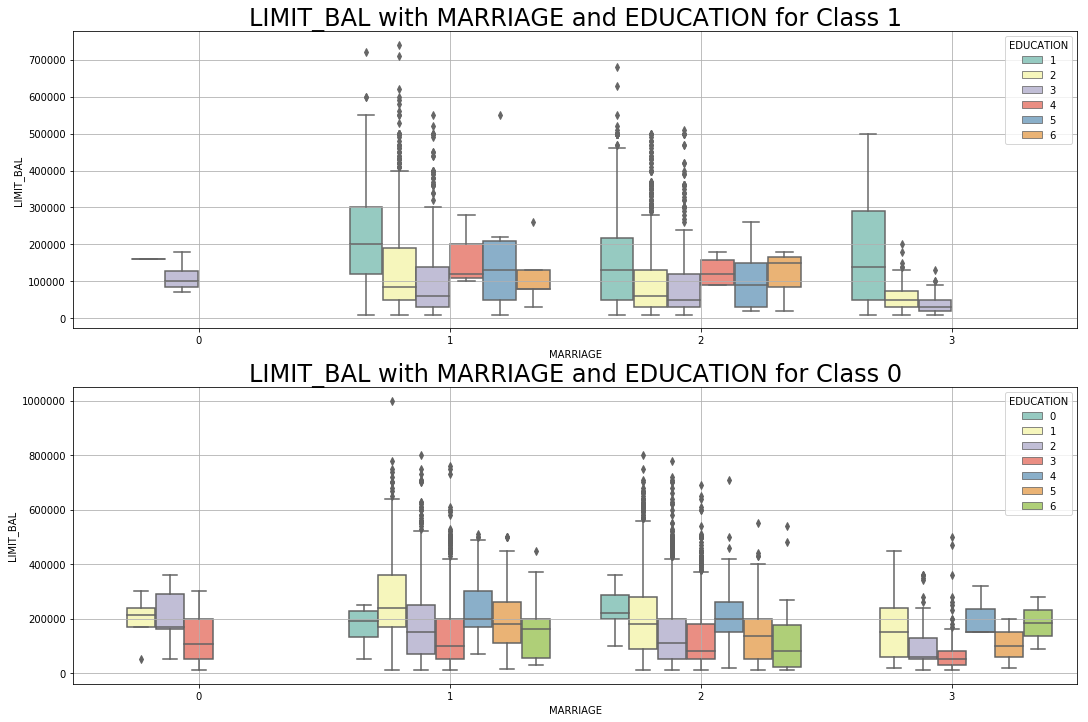

In [16]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x="MARRIAGE", y="LIMIT_BAL", hue="EDUCATION",data=df[df['default payment next month']==1], palette="Set3")
plt.title('LIMIT_BAL with MARRIAGE and EDUCATION for Class 1', fontsize=24)
plt.grid()
plt.subplot(2, 1, 2)
sns.boxplot(x="MARRIAGE", y="LIMIT_BAL", hue="EDUCATION",data=df[df['default payment next month']==0], palette="Set3")
plt.title('LIMIT_BAL with MARRIAGE and EDUCATION for Class 0', fontsize=24)
plt.grid();

In all marriage group in both classes, those from graduate school have the highest median LIMIT_BAL while high school have the lowest LIMIT_BAL.

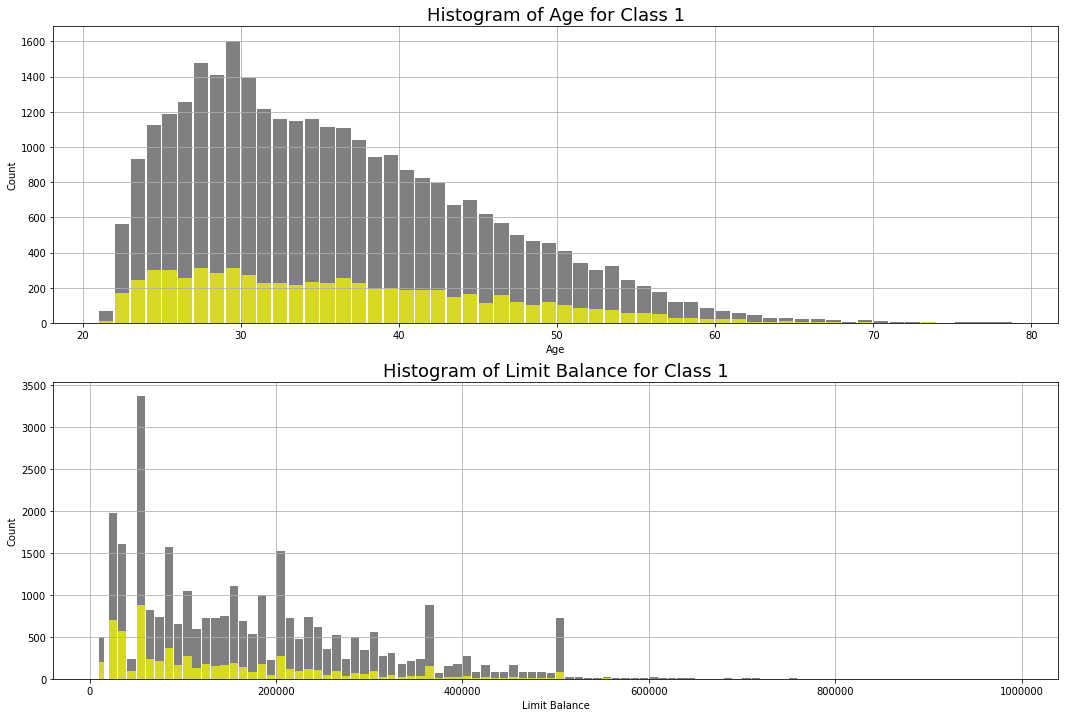

In [17]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 1, 1)
plt.hist(df['AGE'], sorted(df['AGE'].unique()),rwidth=0.9, color ='grey')
plt.hist(df['AGE'][(df['default payment next month']==1)], sorted(df['AGE'].unique()),rwidth=0.9,color='yellow',alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age for Class 1', fontsize=18)
plt.grid()
plt.subplot(2, 1, 2)
plt.hist(df['LIMIT_BAL'], sorted(df['LIMIT_BAL'].unique()),rwidth=0.9, color ='grey')
plt.hist(df['LIMIT_BAL'][(df['default payment next month']==1)], sorted(df['LIMIT_BAL'].unique()),rwidth=0.9,color='yellow',alpha = 0.7)
plt.xlabel('Limit Balance')
plt.ylabel('Count')
plt.title('Histogram of Limit Balance for Class 1', fontsize=18)
plt.grid();

Both figure shows right skewed distribution in Age and Limit Balance. The Majority of the data values fall in the range 25-40 and under 400000 for Age and Limit Balance, respectively.

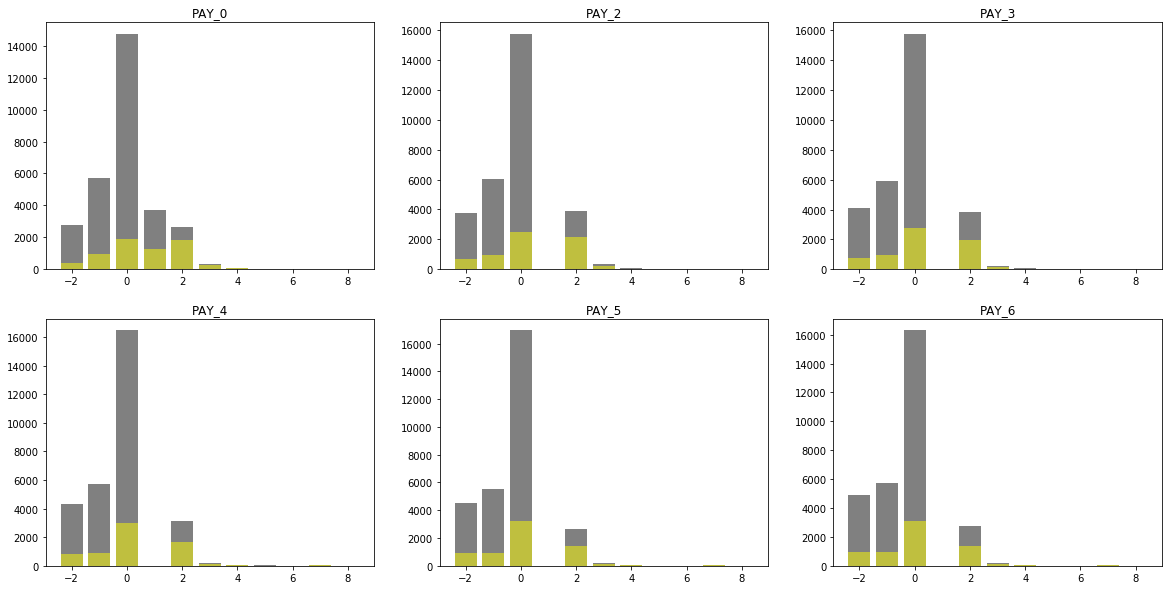

In [18]:
pay_status_cols = ['PAY_0' , 'PAY_2' , 'PAY_3' , 'PAY_4' , 'PAY_5', 'PAY_6']
figure, ax = plt.subplots(2,3)
figure.set_size_inches(20,10)
for j in range(len(pay_status_cols)):
    row,col = int(j/3), j%3
    d  = df[pay_status_cols[j]].value_counts()
    x = df[pay_status_cols[j]][(df['default payment next month']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='grey')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.5)
    ax[row,col].set_title(pay_status_cols[j])

As can be seen from the above figure, the highest occurrence of the Payment Staus fall under the use of revolving credit (0) followed by pay duly (-1), payment delay for two months (2) and no consumption (-2).

# Features correlation

### Correlation between all predictors for both Classes

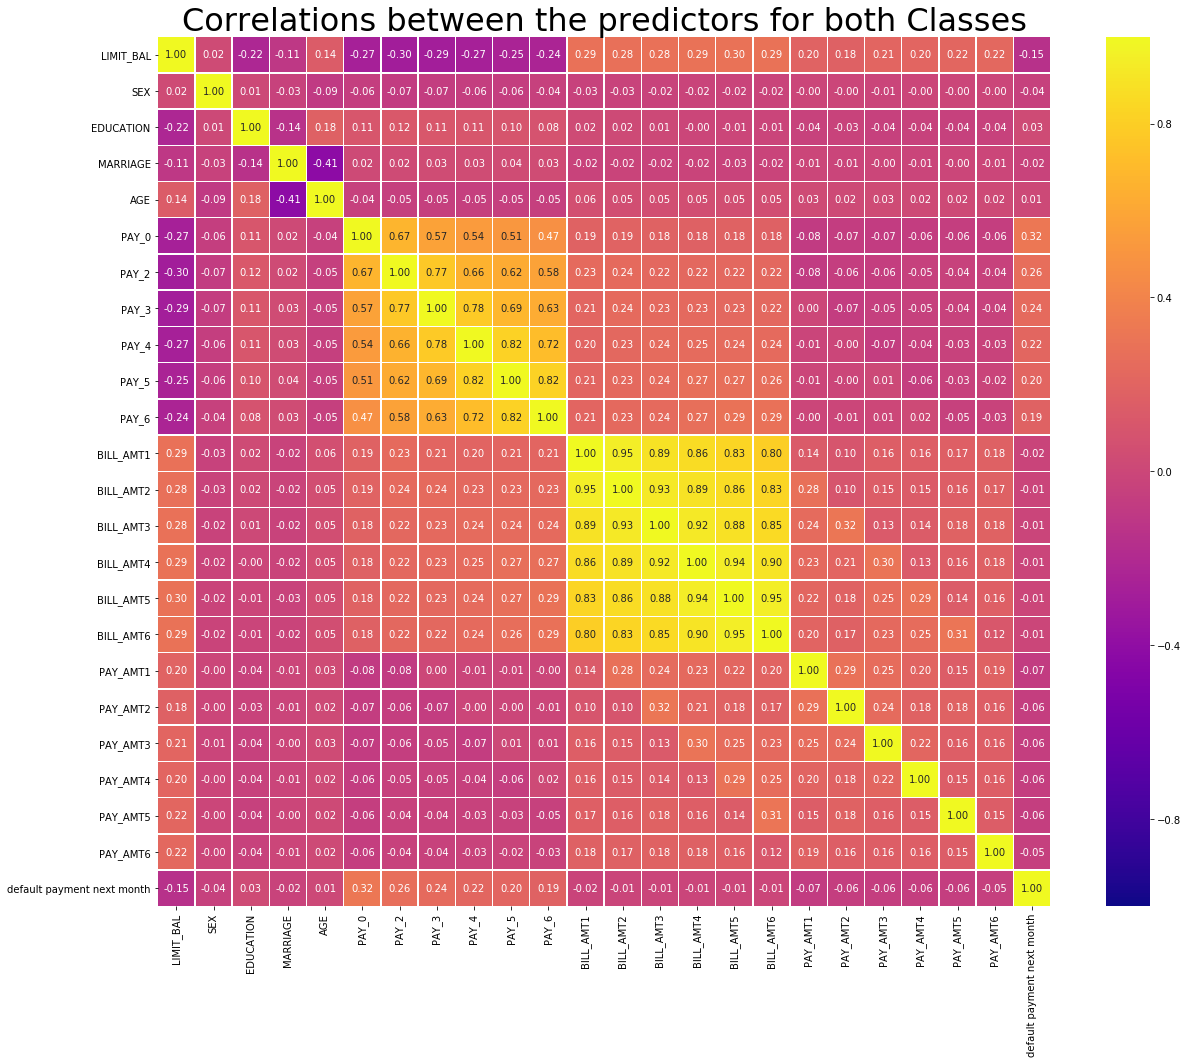

In [19]:
df1=df.drop('ID',axis=1).corr()
plt.figure(figsize=(20,16))
sns.heatmap(df1,annot=True, fmt='.2f',linewidths=.5, vmin=-1, vmax=1,cmap='plasma')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.axis('tight')
plt.title('Correlations between the predictors for both Classes',fontsize=32);

One can notice from the above figure that the correlations are strong among Amount of bill statement and abount Repayment status shows relatively strong correlations among themselves. Now let's same correlations plot for Class 1 and 0 separately.

### Correlation for Class 1

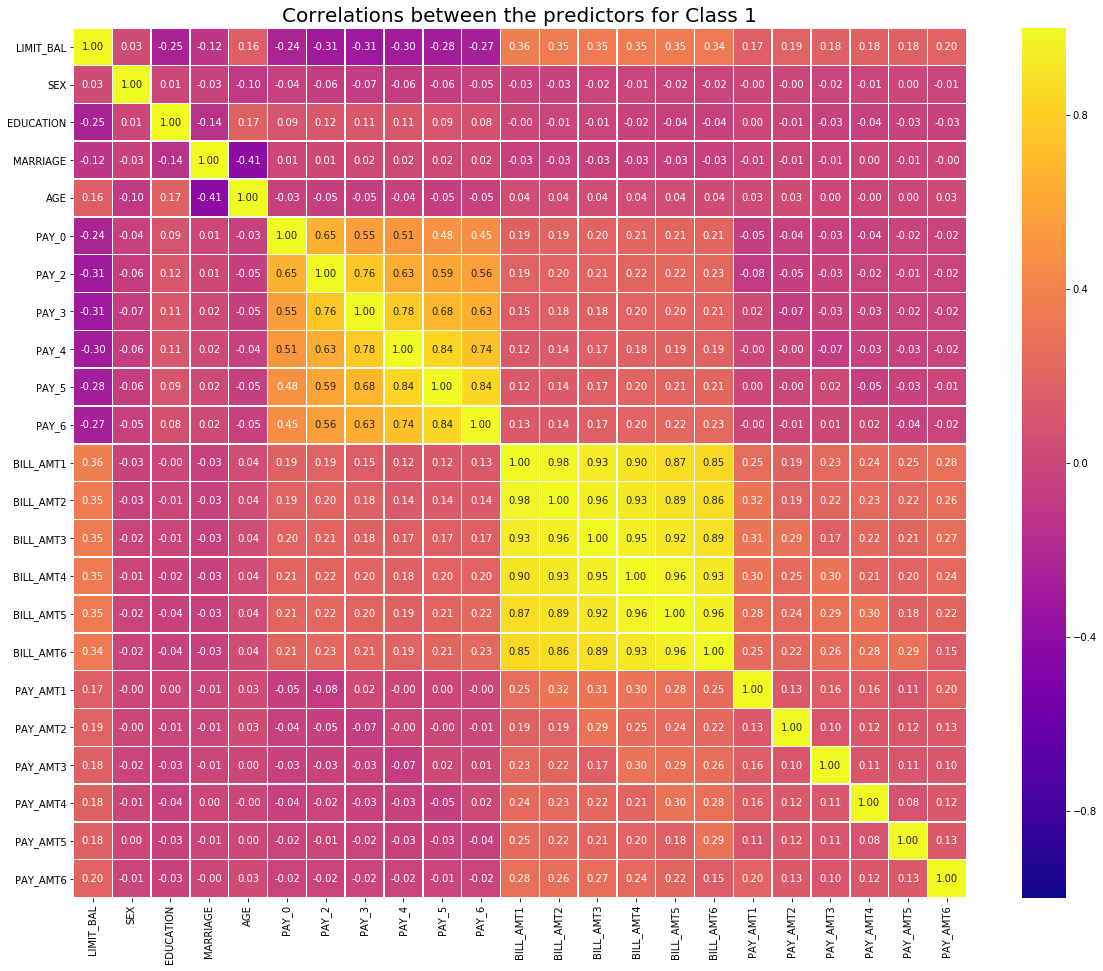

In [20]:
dfy=df[df['default payment next month']==1].drop(['ID', 'default payment next month'],axis=1).corr()
plt.figure(figsize=(20,16))
sns.heatmap(dfy,annot=True, fmt='.2f',linewidths=.5, vmin=-1, vmax=1,cmap='plasma')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.axis('tight')
plt.title('Correlations between the predictors for Class 1',fontsize=20);

Consistent with the previous result, we can strong correlations among Amount of bill statement and Repayment status. 

### Correlation plot for Class 0

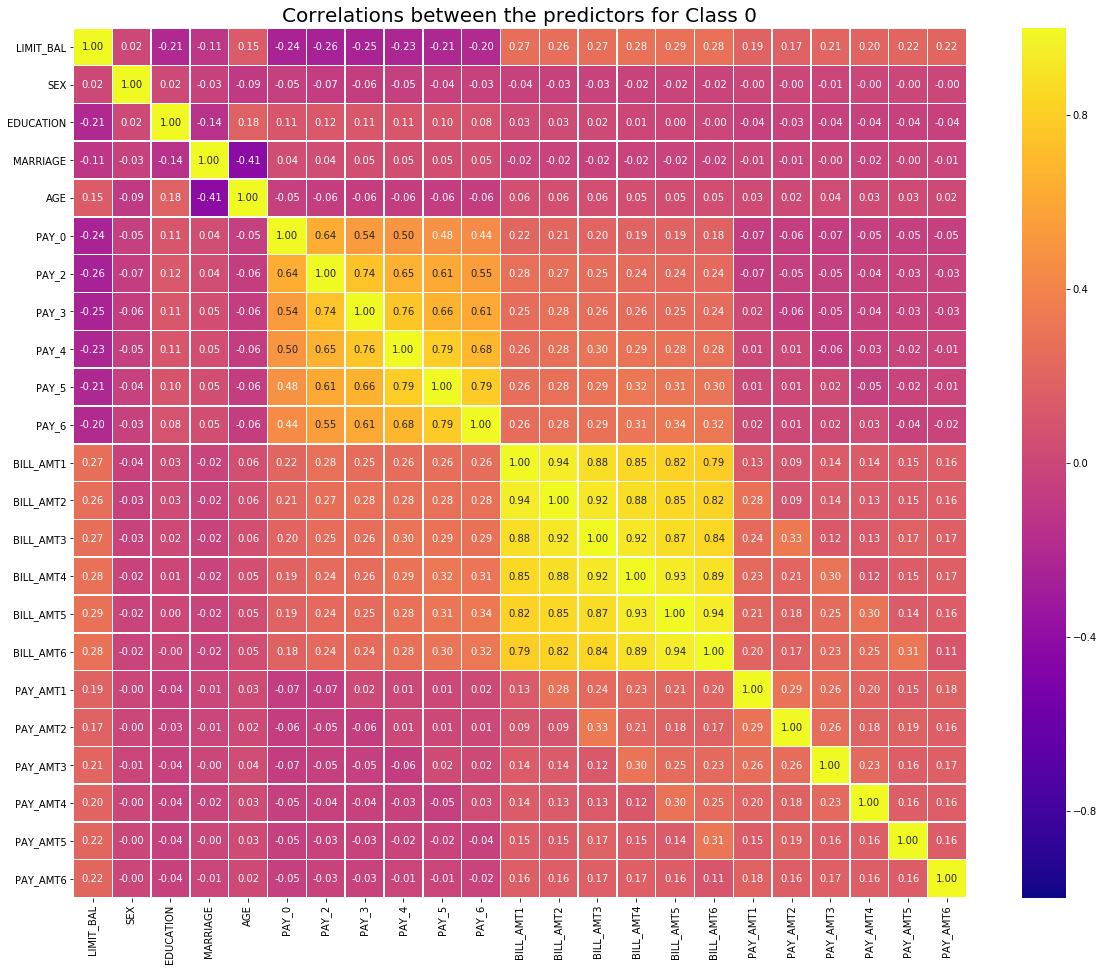

In [21]:
dfn=df[df['default payment next month']==0].drop(['ID', 'default payment next month'],axis=1).corr()
plt.figure(figsize=(20,16))
sns.heatmap(dfn,annot=True, fmt='.2f',linewidths=.5, vmin=-1, vmax=1,cmap='plasma')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.axis('tight')
plt.title('Correlations between the predictors for Class 0',fontsize=20);

Amount of bill statement and Repayment status show strong correlations among themselves in consistent with the previous results.

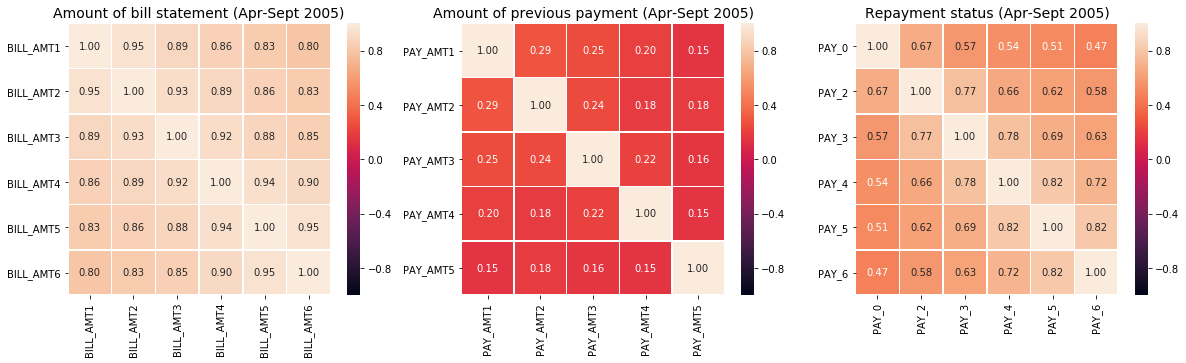

In [22]:
plt.figure(figsize=(20,5))
plt.axis('tight')
plt.subplot(1,3,1)
Xv = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
sns.heatmap(df[Xv].corr(),annot=True, fmt='.2f',linewidths=.5, vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Amount of bill statement (Apr-Sept 2005)',fontsize=14)

plt.subplot(1,3,2)
Xr = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']
sns.heatmap(df[Xr].corr(),annot=True, fmt='.2f',linewidths=.5, vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Amount of previous payment (Apr-Sept 2005)',fontsize=14)

plt.subplot(1,3,3)
Xa = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
sns.heatmap(df[Xa].corr(), annot=True, fmt='.2f',linewidths=.5, vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Repayment status (Apr-Sept 2005)',fontsize=14);

The above figures show strong correlation among the Amount of bill statement and the correlations are even stronger for consecutive months. While the amount of previous payment shows weak correlations among themselves, the repayment status shows reasonable correlations. HHowever, caution needs to be taken in the interpretation as the latter are categorical variables.

Now let's see the correlations of the predictors with target variable.

In [23]:
df.corr()['default payment next month'].sort_values()

LIMIT_BAL                    -0.153520
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT4                     -0.056827
PAY_AMT3                     -0.056250
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
SEX                          -0.039961
MARRIAGE                     -0.024339
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
ID                           -0.013952
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
AGE                           0.013890
EDUCATION                     0.028006
PAY_6                         0.186866
PAY_5                         0.204149
PAY_4                         0.216614
PAY_3                         0.235253
PAY_2                         0.263551
PAY_0                         0.324794
default payment next month    1.000000
Name: default payment nex

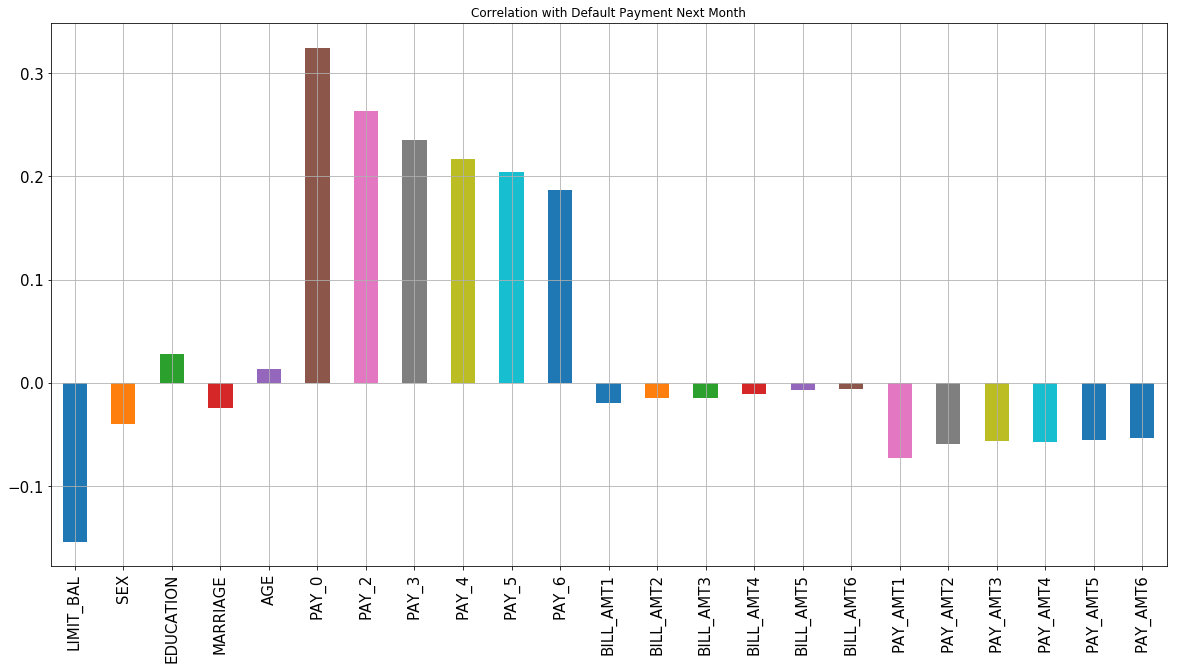

In [24]:
dfc=df.drop(['ID', 'default payment next month'], axis=1)
dfc.corrwith(df['default payment next month']).plot.bar(figsize=(20,10),title="Correlation with Default Payment Next Month", 
                                                        fontsize = 15, rot = 90, grid = True);

One can clearily see from the above figure that the Repayment status have relative strong positive correlations with the target variables (default payment next month). The Amount of given credit in NT dollars (LIMIT_BAL) shows negative correlations with the target variable. Moreover, the Amount of previous payment (BILL_AMT) shows strong correlations with default payment.

In th next section, we will develop models as well as look at the importance predictor variables in detail.

## MODEL TRAINING

It is time now to start building the model. The types of machine leering / deep learning algorithms that are going to utilize for the classification of Cared Card Default are the following:
Random Forest
Gradient Boosting
Extreme me Gradient Boosting
TensorFlow.

We follow two approaches to build our models. First without defining the categorical predictors (i.e., SEX, EDUCATION, MARRIAGE, Repayment status [PAY_0,PAY_2, PAY_3, PAY_4, PAY_5, PAY_6]) and using them as they are. In the second section, we define the categorical features. Furthermore, we will look at the importance of the futures under both cases and try to build model using the top best 1o important features in order to see the performance of the models.
Evaluation of the performance of the models and their comparisons among themselves will be presented. 

# PART I. Without define the categorical features
* (i.e., SEX, EDUCATION, MARRIAGE, Repayment status [PAY_0,PAY_2, PAY_3, PAY_4, PAY_5, PAY_6]).

### Define predictors and target values

In [25]:
X = df.drop(['ID', 'default payment next month'], axis=1).values  #df.iloc[:, 1:-1]
y = df['default payment next month'].values

### Splitting the data set into training and test data sets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

### Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Random Forest Classifer

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=8, n_estimators = 100, criterion = 'entropy', bootstrap= False, random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### RF >>>> Prediction using test dataset

In [30]:
#Probability of Class 1
y_predrf0=np.round(rf.predict_proba(X_test)[:, 1], 2)
#Predicting the class 1
y_predrf = pd.Series(np.where(y_predrf0 >= 0.5, 1, 0)) #rf.predict(X_test)

In [31]:
Result_rf=pd.DataFrame()
Result_rf['Actual Class'] = pd.Series(y_test)
Result_rf['Predicted Class'] = pd.Series(y_predrf )
Result_rf['Probability of Class 1'] = pd.Series(y_predrf0)
Result_rf

,Actual Class,Predicted Class,Probability of Class 1
0,1,0,0.34
1,0,0,0.15
2,0,0,0.17
3,0,0,0.12
4,0,0,0.11
5,0,0,0.11
6,0,0,0.15
7,0,0,0.13
8,1,0,0.21
9,0,0,0.07


In the above shown result, we used the probability threshold value of 0.50 in order for set the observations as Class 1. However, the choice of a threshold value is business dependent and needs to be taken very seriously selecting it.

### RF >>>> Evaluating Model Performance

In [32]:
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_predrf)}')  
print(f'Classification Report:\n {classification_report(y_test,y_predrf)}')
print(f'Precision: {precision_score(y_test, y_predrf)}')  
print(f'Recall: {recall_score(y_test, y_predrf)}') 
print(f'Accuracy: {accuracy_score(y_test, y_predrf)}') 

Confusion Matrix: 
 [[5637  238]
 [1066  559]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      5875
           1       0.70      0.34      0.46      1625

    accuracy                           0.83      7500
   macro avg       0.77      0.65      0.68      7500
weighted avg       0.81      0.83      0.80      7500

Precision: 0.7013801756587202
Recall: 0.344
Accuracy: 0.8261333333333334


The accuracy of the model is around 82%; however, the recall and and the precision are 35% and 64%, respectively. The precision is relatively high while the recall is small. The precision-recall curve shows the tradeoff between precision and recall for different threshold. While high precision relates to a low false positive rate, high recall relates to a low false negative rate.

# Receiver Operating Characteristic (ROC) curve plot

Area Under the Curve: 0.65


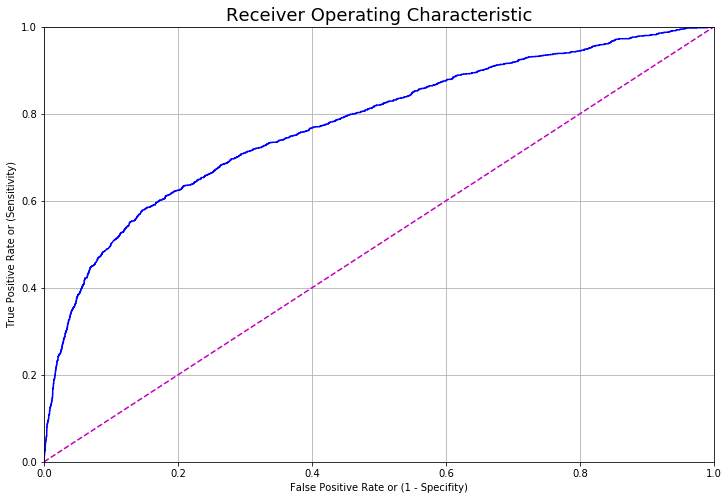

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
auc = np.round(roc_auc_score(y_test, np.where(np.round(rf.predict_proba(X_test)[:, 1], 2)>=0.50, 1.0,0)), 2)
print(f'Area Under the Curve: {auc}')
# Plot ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'm--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic', fontsize=18);

This ROC cuve created using the probability threshold value 0.50 to classify the default. The diagonal line, which divides the ROC space, a random guess. While points above the diagonal represent good classification results (better than random), points below the line represent bad results (worse than random).
The Area Under the Curve 0.7 means that there is 70% chance that model will be able to distinguish between positive class and negative class. If the Area Under the Curve is 1, it means there is perfect prediction by the model. If the Area Under the Curve is 0.5, it would mean the model is unable to discriminate between classes.  

# RF >>>> Applying k-Fold Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print(f'Mean accuracy: {accuracies.mean()}')
print(f'Standard deviation: {accuracies.std()}')

from sklearn.model_selection import cross_val_predict
y_predrfx = cross_val_predict(estimator = rf, X = X_train, y = y_train, cv = 10)
print(f'Confusion Matrix:\n {confusion_matrix(y_train, y_predrfx)}')

Mean accuracy: 0.8191555555555554
Standard deviation: 0.004974800697043919
Confusion Matrix:
 [[16646   843]
 [ 3226  1785]]


This shows a good performance of the model (No overfitting) and the k-fold cross validation shows mean around 82% and standard deviation of 0.005%. The mean value is very close the result obtained from the unseen test data set.

### Important Features

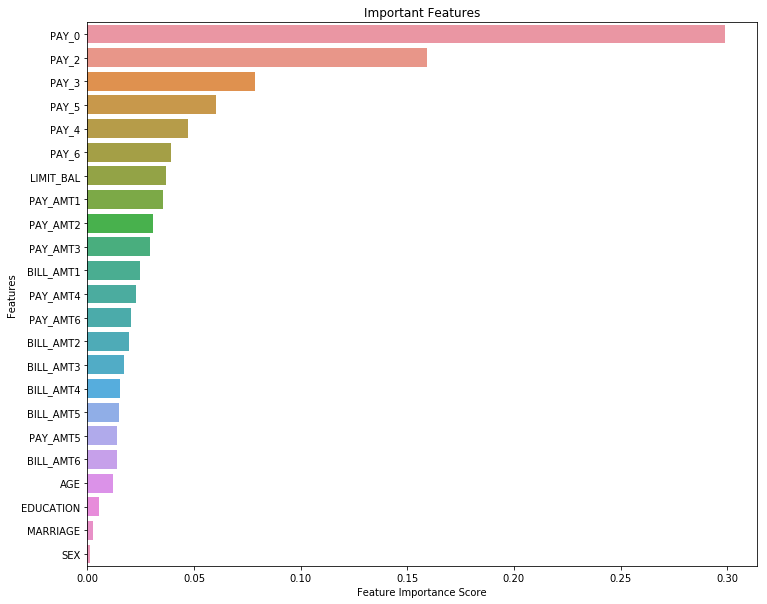

In [35]:
colx = df.drop(['ID', 'default payment next month'], axis=1).columns
feature_imprf = pd.Series(rf.feature_importances_,index=colx).sort_values(ascending=False)
plt.figure(figsize=(12,10))
sns.barplot(x=feature_imprf, y=feature_imprf.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features");

The above figure reveals the importance of each feature. The top 10 best features are according to Random Forest Classifier are PAY_0, PAY_2, PAY_3, PAY_5, PAY_4, PAY_6, LIMIT_BAL, PAY_AMT1, PAY_AMT2, PAY_AMT3, and BILL_AMT1.

One can utilize tune hyperparameters shown below to find the best model parameters and get better model performce. However, it requires high computing power.

### RF >>>> Applying Grid Search to find the best model parameters

In [37]:
# param_grid = {'bootstrap': [True, False],'criterion': ['gini', "entropy"], 'n_estimators': [50, 100, 200], 'max_depth': [8, 10, 12, 14]}
# grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring = 'accuracy', cv= 10)
# grid.fit(X_train, y_train)
# means=grid.cv_results_['mean_test_score']
# stds = grid.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, grid.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# XGBoost Classifier

In [38]:
cxgb=df.drop(['ID', 'default payment next month'],axis=1).columns
X_traino=pd.DataFrame(X_train, columns=cxgb)

In [39]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(max_depth=12, n_estimators=600, learning_rate=0.4, random_state = 0)
xgb.fit(X_traino, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.4, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=None, n_estimators=600,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

### XGB >>>> Predicting the Test set results

In [40]:
# y_predxg = xgb.predict(pd.DataFrame(X_test, columns=cxgb))
#Probability of Class 1
y_pred_probaxg = np.round(xgb.predict_proba(pd.DataFrame(X_test, columns=cxgb)), 2)
#Predicting the Class 1
y_predxg=np.where(y_pred_probaxg[:,1]>=0.5,1.0,0.0)

### XGB >>>> Displaying the result

In [41]:
Result_xgb=pd.DataFrame()
Result_xgb['Actual Class'] = pd.Series(y_test)
Result_xgb['Predicted Class'] = pd.Series(y_predxg)
Result_xgb['Probability of Class 1'] = pd.Series(y_pred_probaxg[:,1])
Result_xgb

,Actual Class,Predicted Class,Probability of Class 1
0,1,0.0,0.02
1,0,0.0,0.00
2,0,0.0,0.02
3,0,0.0,0.03
4,0,0.0,0.00
5,0,0.0,0.00
6,0,0.0,0.00
7,0,0.0,0.02
8,1,0.0,0.00
9,0,0.0,0.00


### XGB >>> Evaluating Model Performance

In [42]:
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_predxg)}')  
print(f'Classification Report:\n {classification_report(y_test,y_predxg)}')
print(f'Precision: {precision_score(y_test, y_predxg)}')  
print(f'Recall: {recall_score(y_test, y_predxg)}') 
print(f'Accuracy: {accuracy_score(y_test, y_predxg)}') 

Confusion Matrix: 
 [[5404  471]
 [1017  608]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      5875
           1       0.56      0.37      0.45      1625

    accuracy                           0.80      7500
   macro avg       0.70      0.65      0.66      7500
weighted avg       0.78      0.80      0.79      7500

Precision: 0.5634847080630213
Recall: 0.37415384615384617
Accuracy: 0.8016


The accuarcy and recall of Random Forest and Extreme Gradient Boosting classifiers seem to have comparable values. However, the Random Forest seems to show slightly high precision value. Now let's see if this result is consistent by applying k-Fold Cross validation.

# Receiver Operating Characteristic (ROC) Curve

Area Under the Curve: 0.65


Text(0.5,1,'Receiver Operating Characteristic')

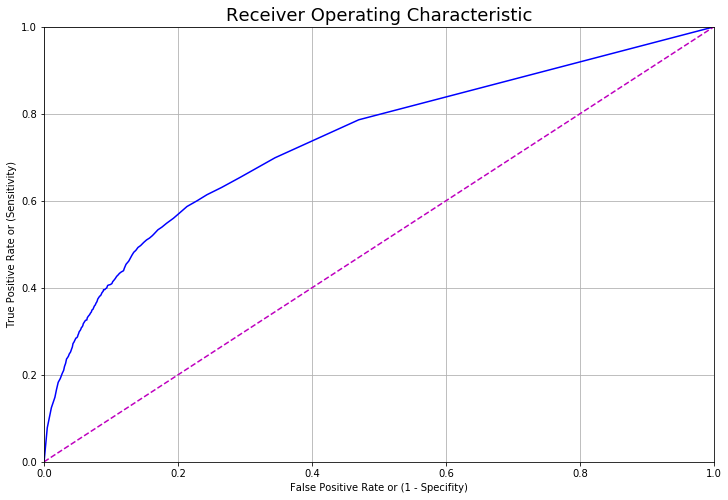

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probaxg[:,1])
auc0 = np.round(roc_auc_score(y_test, y_predxg), 2)
print(f'Area Under the Curve: {auc0}')
# Plot ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'm--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic', fontsize=18)

### XGB >>>> Applying k-Fold Cross Validation

In [44]:
accuracies = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)
y_predlr1xgb = cross_val_predict(estimator = xgb, X = X_train, y = y_train, cv = 10)
print(f'cm:\n {confusion_matrix(y_train, y_predlr1xgb)}')
print(f'Mean accuracy: \n {accuracies.mean()}')
print(f'Std dev: \n {accuracies.std()}')

cm:
 [[16092  1397]
 [ 3110  1901]]
Mean accuracy: 
 0.7996888888888889
Std dev: 
 0.0041884025653443095


Indeed, it is consistent with the result obtained above using unseen test data set with mean arouns 80% and standard deviation of 0.004. This suggests that the model doesn't seem to be overfit. Of course, one can also emplyee grid search to find the best model paramters but it requires computation high power.

### XGB >>>> Applying Grid Search to find the best model parameters

In [ ]:
# param_grid = {'n_estimators':[200, 400, 600, 800], 'max_depth': [8, 10, 12, 14], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]}
# Sgrid = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring = 'accuracy', cv= 10, n_jobs = -1)
# grid.fit(X_train, y_train)
# means=grid.cv_results_['mean_test_score']
# stds = grid.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, grid.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

### XGB >>>> Feature Importance

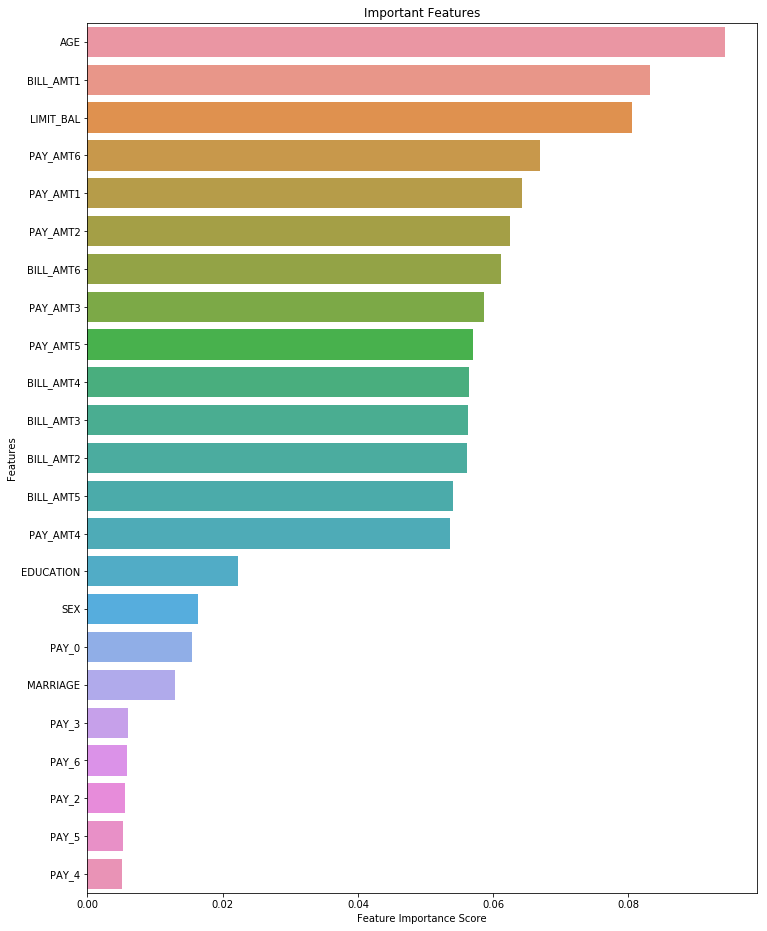

In [45]:
feature_impxg = pd.Series(xgb.feature_importances_,index=colx).sort_values(ascending=False)
plt.figure(figsize=(12,16))
sns.barplot(x=feature_impxg, y=feature_impxg.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features");

The above figure reveals the importance of each feature. The top 10 best features are according to Extreme Gradient Boosting Classifier are AGE, BILL_AMT1, LIMIT_BAL, PAY_AMT6, PAY_AMT1, PAY_AMT2, BILL_AMT6, PAY_AMT3, PAY_AMT5, BILL_AMT4, and BILL_AMT3.

#  Gradient Boosting Classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(max_depth = 8, n_estimators=140, learning_rate=0.01, random_state = 0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### GB >>>> Predicting the Test set results

In [47]:
# Probability of Class 1
y_pred_probagb = np.round(gb.predict_proba(X_test), 2)
# Predicting the Class 1
y_predgb=np.where(y_pred_probagb[:,1]>=0.5,1.0,0.0)

### GB >>>> Displaying the result

In [48]:
Result_gb=pd.DataFrame()
Result_gb['Actual Class'] = pd.Series(y_test)
Result_gb['Predicted Class'] = pd.Series(y_predgb)
Result_gb['Probability of Class 1'] =  pd.Series(y_pred_probagb[:,1])
Result_gb

,Actual Class,Predicted Class,Probability of Class 1
0,1,0.0,0.36
1,0,0.0,0.15
2,0,0.0,0.18
3,0,0.0,0.16
4,0,0.0,0.14
5,0,0.0,0.15
6,0,0.0,0.17
7,0,0.0,0.14
8,1,0.0,0.20
9,0,0.0,0.09


### GB >>> Evaluating Model Performance

In [49]:
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_predgb)}')  
print(f'Classification Report:\n {classification_report(y_test,y_predgb)}')
print(f'Precision: {precision_score(y_test, y_predgb)}')  
print(f'Recall: {recall_score(y_test, y_predgb)}') 
print(f'Accuracy: {accuracy_score(y_test, y_predgb)}') 

Confusion Matrix:
 [[5673  202]
 [1139  486]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      5875
           1       0.71      0.30      0.42      1625

    accuracy                           0.82      7500
   macro avg       0.77      0.63      0.66      7500
weighted avg       0.81      0.82      0.79      7500

Precision: 0.7063953488372093
Recall: 0.2990769230769231
Accuracy: 0.8212


The model accuracy is close to the results obtaied from Random Forest but a little higher than the result obtained from and Extreme Gradient Boosting, but the recall and precision values values are slight lower.

Now let's apply k-Fold cross validation and see the consistency of the result.

### GB >>>> Applying k-Fold Cross Validation

In [50]:
accuracies = cross_val_score(estimator = gb, X = X_train, y = y_train, cv = 10)
y_predlr1gb = cross_val_predict(estimator = gb, X = X_train, y = y_train, cv = 10)
print(f'cm: \n {confusion_matrix(y_train, y_predlr1gb)}')
print(f'Mean accuracy: \n {accuracies.mean()}')
print(f'Std dev: \n {accuracies.std()}')

cm: 
 [[16821   668]
 [ 3464  1547]]
Mean accuracy: 
 0.8163555555555556
Std dev: 
 0.004443555466648879


Of course, the result shows the model doesn't seem to overfit. One can also tune the hyperparameters to improve the model performance.

# Receiver Operating Characteristic (ROC) Curve

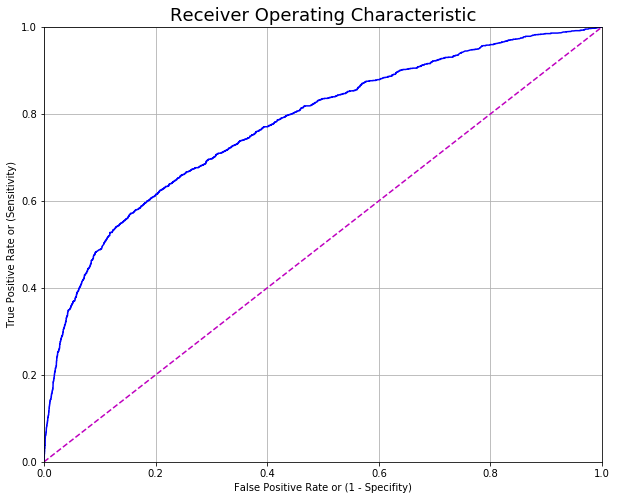

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:, 1])
auc = np.round(roc_auc_score(y_test, np.where(np.round(gb.predict_proba(X_test)[:, 1], 2)>=0.50, 1.0,0)), 2)
# Plot ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'm--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic', fontsize=18);

### GB >>>> Applying Grid Search to find the best model parameters

In [ ]:
# param_grid = {'n_estimators': [100, 140, 150],  'learning_rate': [0.005, 0.01, 0.02, 0.03], 'max_depth': [6, 8, 10]}
# grid = GridSearchCV(estimator=gb, param_grid=param_grid, scoring = 'accuracy', cv= 10, n_jobs = -1)
# grid.fit(X_train, y_train)
# means=grid.cv_results_['mean_test_score']
# stds = grid.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, grid.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

### GB >>>> Feature Importance

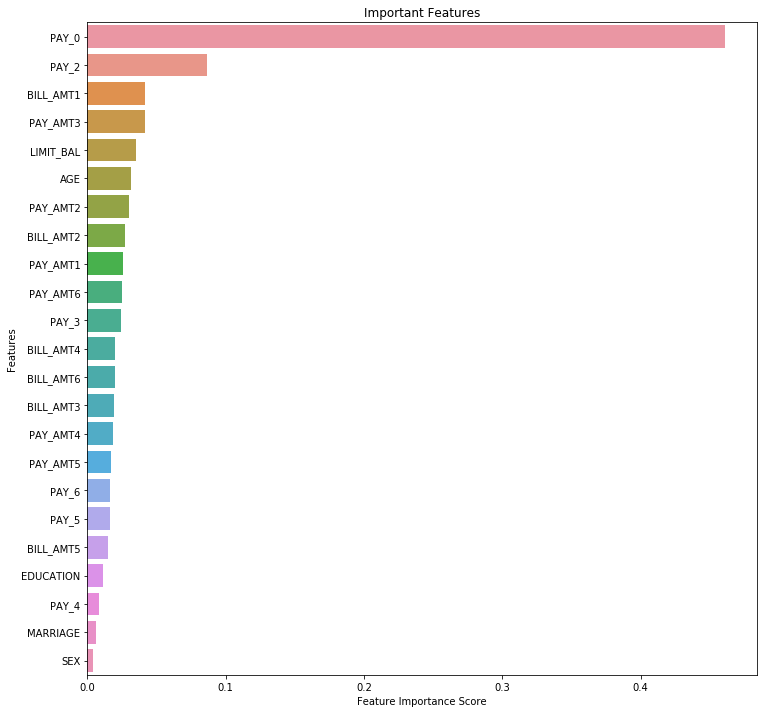

In [52]:
feature_impgb = pd.Series(gb.feature_importances_,index=colx).sort_values(ascending=False)
plt.figure(figsize=(12,12))
sns.barplot(x=feature_impgb, y=feature_impgb.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features");

The above figure reveals the importance of each feature. The top 10 best features are according to Gradient Boosting Classifier are PAY_0, PAY_2,BILL_AMT1,PAY_AMT3,LIMIT_BAL,AGE,PAY_AMT2,BILL_AMT2,PAY_AMT1,PAY_AMT6,and PAY_3.

Now it is time to utilize the power of Atrificial Neural Network. Let's use our choise of deep learning library TensorFlow 2.0 for both its high performance and easy implimentation using the Keras API. We will be applying both dropout and earlystopping to avoid overfit.

# Tensorflow Classfier

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
tf.__version__

'2.0.0'

In [54]:
X.shape

(30000, 23)

In [55]:
TF = Sequential()
#23 feature inputs Going into a 46-unit layer
TF.add(Dense(units=46, activation='relu', kernel_initializer='normal', input_shape=(X_train.shape[1], )))
# TF.add(Dropout(0.3)) #Adding a Dropout layer
# Another hidden layer of 23 units
TF.add(Dense(units=23, activation='relu', kernel_initializer='normal'))
# TF.add(Dropout(0.3)) #Adding a Dropout layer
# Another hidden layer of 12 units
TF.add(Dense(units=12, activation='relu', kernel_initializer='normal'))
# TF.add(Dropout(0.3)) #Adding a Dropout layer
# Output layer with a binary classification (Default Payment Next Month Yes or No)
TF.add(Dense(units=1, activation='sigmoid'))
#Compiling model
TF.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  
TF.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 46)                1104      
_________________________________________________________________
dense_1 (Dense)              (None, 23)                1081      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                288       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 2,486
Trainable params: 2,486
Non-trainable params: 0
_________________________________________________________________


### Adding Earlystopping

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3) #25
# early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=25)

In [57]:
TF.fit(x=X_train, y=y_train, batch_size=128, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Train on 22500 samples, validate on 7500 samples
Epoch 1/600
22500/22500 [==============================] - 1s 59us/sample - loss: 0.5428 - accuracy: 0.7863 - val_loss: 0.4560 - val_accuracy: 0.8171
Epoch 2/600
22500/22500 [==============================] - 0s 18us/sample - loss: 0.4548 - accuracy: 0.8117 - val_loss: 0.4434 - val_accuracy: 0.8213
Epoch 3/600
22500/22500 [==============================] - 0s 18us/sample - loss: 0.4467 - accuracy: 0.8167 - val_loss: 0.4404 - val_accuracy: 0.8247
Epoch 4/600
22500/22500 [==============================] - 0s 18us/sample - loss: 0.4430 - accuracy: 0.8173 - val_loss: 0.4355 - val_accuracy: 0.8243
Epoch 5/600
22500/22500 [==============================] - 0s 18us/sample - loss: 0.4406 - accuracy: 0.8176 - val_loss: 0.4352 - val_accuracy: 0.8231
Epoch 6/600
22500/22500 [==============================] - 0s 18us/sample - loss: 0.4387 - accuracy: 0.8183 - val_loss: 0.4395 - val_accuracy: 0.8232
Epoch 7/600
22500/22500 [==========================

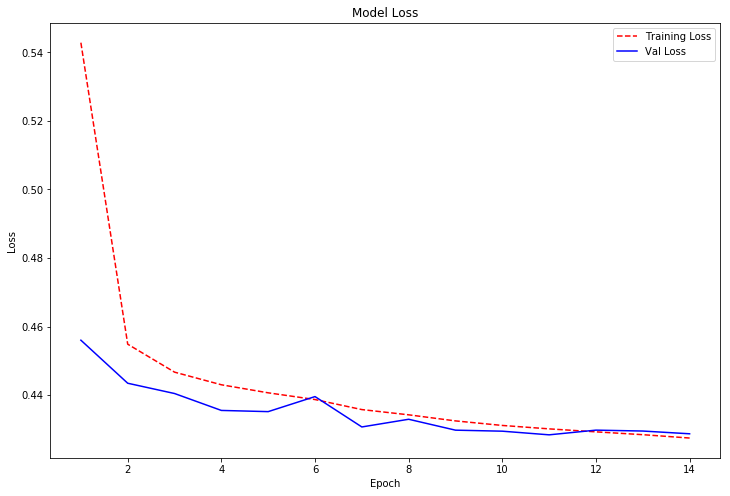

In [58]:
model_loss = pd.DataFrame(TF.history.history)
epocx = range(1, len( model_loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epocx, model_loss['loss'], 'r--', epocx, model_loss['val_loss'],'b-'); #model_loss[['loss','val_loss']]
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss');

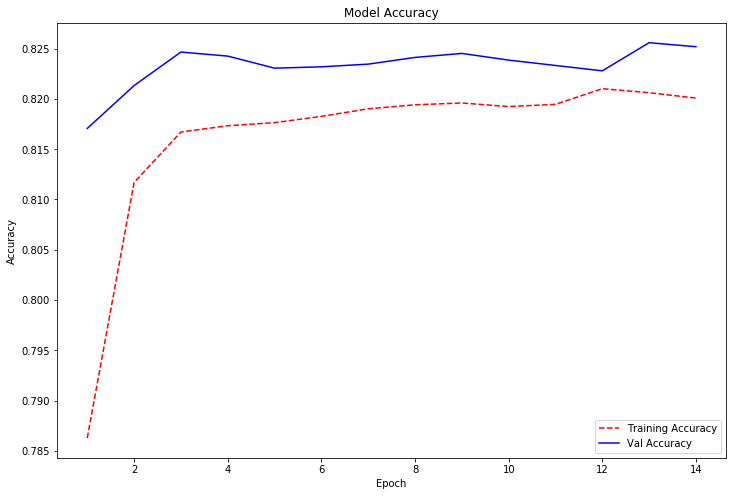

In [59]:
plt.figure(figsize=(12,8))
#plt.plot(model_loss[['accuracy', 'val_accuracy']]);  #.plot()
plt.plot(epocx, model_loss['accuracy'], 'r--', epocx, model_loss['val_accuracy'],'b-')
plt.legend(['Training Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy');

### TF >>>> Predict the response for test dataset

In [60]:
#Probability of Class 1
y_predtf = np.round(TF.predict(X_test),2)
#Predicting the Class 1
y_predtf0=np.where(y_predtf>=0.5,1.0,0.0)

### Displaying the result

In [61]:
Result_tf=pd.DataFrame()
Result_tf['Actual Class'] = pd.Series(y_test)
Result_tf['Predicted Class'] = pd.Series(y_predtf0[:,0])
Result_tf['Probability of Class 1'] = pd.Series(y_predtf[:,0])
Result_tf

,Actual Class,Predicted Class,Probability of Class 1
0,1,0.0,0.32
1,0,0.0,0.15
2,0,0.0,0.20
3,0,0.0,0.14
4,0,0.0,0.11
5,0,0.0,0.13
6,0,0.0,0.13
7,0,0.0,0.12
8,1,0.0,0.20
9,0,0.0,0.04


### TF >>> Evaluating Model Performance

In [62]:
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_predtf0)}')  
print(f'Classification Report:\n {classification_report(y_test,y_predtf0)}')
print(f'Precision: {precision_score(y_test, y_predtf0)}')  
print(f'Recall: {recall_score(y_test, y_predtf0)}') 
print(f'Accuracy: {accuracy_score(y_test, y_predtf0)}') 

Confusion Matrix: 
 [[5568  307]
 [1006  619]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      5875
           1       0.67      0.38      0.49      1625

    accuracy                           0.82      7500
   macro avg       0.76      0.66      0.69      7500
weighted avg       0.81      0.82      0.81      7500

Precision: 0.6684665226781857
Recall: 0.3809230769230769
Accuracy: 0.8249333333333333


The overall performace seems better the others even though the difference is not significant. However, its perormance can improved by tuning the hyperparameters (for example, adding additional layers and neorons, changing dropout values, ...).

# Feature Selection to Reduce Dimension of the Dataset

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#Let's apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
dfs = df.drop(['ID', 'default payment next month'], axis=1)
Xs = dfs.values
ys = df['default payment next month'].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Xs_snd = sc.fit_transform(Xs)
fit = bestfeatures.fit(Xs_snd,ys)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dfs.columns)
#concat the dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

     Features       Score
5       PAY_0  201.517549
6       PAY_2  160.027300
7       PAY_3  129.692706
8       PAY_4  108.131709
9       PAY_5   92.598810
10      PAY_6   81.065996
0   LIMIT_BAL   76.341829
1         SEX   18.983326
21   PAY_AMT5   10.394332
22   PAY_AMT6    9.725684


The top 10 best Important Features obtained from Random Forest, Gradient Boosting and Excrement Gradient Boosting Classifiers seem to be different but some of them are found in all cases. I’ve also extracted the top 10 best feature using the SelectKbest tool from Sklearn and these features seem to align with the one obtained from the Random Forest Classifier. 

# Model Training using the top 10 best predictors

Just for fun let's use only the the top 10 best predictors to develop our and see the performance of models. For this work, let's use the top 10 best features obtained. Of course, one can try the top 10 best features obtained from Gradient Boosting and Extreme Gradient Boosting Classifiers.

### Define predictors and target values

In [64]:
best_top_10_new_features=feature_imprf.index[0:11]
best_top_10_new_features

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_5', 'PAY_4', 'PAY_6', 'LIMIT_BAL',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'BILL_AMT1'],
      dtype='object')

In [65]:
X2 = df[best_top_10_new_features].values
y2 = df['default payment next month'].values

### Splitting the data set into training and test data sets

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.25,random_state=101)

### Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

# Random Forest Classifer

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier(max_depth=8,n_estimators=100,criterion='entropy',bootstrap=True,random_state = 0)
rf2.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### RF >>>> Predicting the Test set results

In [70]:
#Probability of Class 1
y_predrf02 = np.round(rf2.predict_proba(X2_test)[:, 1], 2)
#Predicting the Class 1
y_predrf2=np.where(y_predrf02>=0.5, 1.0, 0.0)

### RF >>>> Displaying the results

In [71]:
Result_rf5=pd.DataFrame()
Result_rf5['Actual Class'] = pd.Series(y2_test)
Result_rf5['Predicted Class'] = pd.Series(y_predrf2 )
Result_rf5['Probability of Class 1'] = pd.Series(y_predrf02)
Result_rf5

,Actual Class,Predicted Class,Probability of Class 1
0,1,0.0,0.33
1,0,0.0,0.14
2,0,0.0,0.17
3,0,0.0,0.12
4,0,0.0,0.11
5,0,0.0,0.10
6,0,0.0,0.20
7,0,0.0,0.12
8,1,0.0,0.20
9,0,0.0,0.05


### RF >>>> Evaluating Model Performance

In [72]:
print(f'Confusion Matrix: \n {confusion_matrix(y2_test, y_predrf2)}')  
print(f'Classification Report:\n {classification_report(y2_test,y_predrf2)}')
print(f'Precision: {precision_score(y2_test, y_predrf2)}')  
print(f'Recall: {recall_score(y2_test, y_predrf2)}') 
print(f'Accuracy: {accuracy_score(y2_test, y_predrf2)}') 

Confusion Matrix: 
 [[5622  253]
 [1043  582]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      5875
           1       0.70      0.36      0.47      1625

    accuracy                           0.83      7500
   macro avg       0.77      0.66      0.68      7500
weighted avg       0.81      0.83      0.80      7500

Precision: 0.6970059880239521
Recall: 0.35815384615384616
Accuracy: 0.8272


As can be seen from the above result, using the top 10 best features seem to improve the performance of the model but not significantly. However, teh model performace can be improved applying grid search to get the best model pameters. Now let's apply k-Fold cross validation to see overfitting of the model.

### RF >>>> Applying k-Fold Cross Validation

In [73]:
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
y_predlr1rf = cross_val_predict(estimator = rf, X = X_train, y = y_train, cv = 10)

print(f'cm: {confusion_matrix(y_train, y_predlr1rf)}')
print(f'Mean accuracy: {accuracies.mean()}')
print(f'Std dev: {accuracies.std()}')

cm: [[16646   843]
 [ 3226  1785]]
Mean accuracy: 0.8191555555555554
Std dev: 0.004974800697043919


Indeed, the model doesn't seem to overfit. One can also apply Grid Search to ge the best model hyperparameters as show below.

### RF >>>> Applying Grid Search to find the best model parameters

In [ ]:
# param_grid = {'bootstrap': [True, False],'criterion': ['gini', "entropy"], 'n_estimators': [50, 100, 200]}
# grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring = 'accuracy', cv= 10) #, n_jobs = -1
# grid.fit(X_train, y_train)
# means=grid.cv_results_['mean_test_score']
# stds = grid.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, grid.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# PART II. Define the categorical features
* (i.e., SEX, EDUCATION, MARRIAGE,PAY_0,PAY_2, PAY_3, PAY_4, PAY_5, PAY_6)

In [75]:
cols_to_transform = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [76]:
dfd = pd.get_dummies( df, columns = cols_to_transform, drop_first=True)
dfd.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-1', 'PAY_0_0',
       'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6',
       'PAY_0_7', 'PAY_0_8', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2',
       'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8',
       'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4',
       'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0',
       'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6',
       'PAY_4_7', 'PAY_4_8', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3',
       'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1',

In [77]:
dfd.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,34,29239,14027,13559,14331,14948,15549,1518,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,37,46990,48233,49291,28314,28959,29547,2000,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,57,8617,5670,35835,20940,19146,19131,2000,...,0,0,1,0,0,0,0,0,0,0


### Define predictors and target values

In [78]:
Xd = dfd.drop(['ID', 'default payment next month'], axis=1).values
yd = dfd['default payment next month'].values

### Splitting the data set into training and test data sets

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd,yd,test_size=0.25,random_state=101)

### Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler
scd = StandardScaler()
Xd_train = scd.fit_transform(Xd_train)
Xd_test = scd.transform(Xd_test)

#  Gradient Boosting Classifier

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gb4 = GradientBoostingClassifier(max_depth = 6, n_estimators=200, learning_rate=0.02, random_state = 0)
gb4.fit(Xd_train, yd_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### GB >>>> Predicting the Test set results

In [83]:
#Probability of Class 1
y_pred_probagb4 = np.round(gb4.predict_proba(Xd_test), 2)
#Predicting the Class 1
y_predgb4=np.where(y_pred_probagb4[:,1]>=0.5,1.0,0.0)

### GB >>>> Displaying the result

In [84]:
Result_gb4=pd.DataFrame()
Result_gb4['Actual Class'] = pd.Series(yd_test)
Result_gb4['Predicted Class'] = pd.Series(y_predgb4)
Result_gb4['Probability of Class 1'] = pd.Series(y_pred_probagb4[:,1])
Result_gb4

,Actual Class,Predicted Class,Probability of Class 1
0,1,0.0,0.34
1,0,0.0,0.13
2,0,0.0,0.17
3,0,0.0,0.13
4,0,0.0,0.10
5,0,0.0,0.07
6,0,0.0,0.15
7,0,0.0,0.13
8,1,0.0,0.24
9,0,0.0,0.06


### GB >>> Evaluating Model Performance

In [85]:
print(f'Confusion Matrix:\n {confusion_matrix(yd_test, y_predgb4)}')  
print(f'Classification Report:\n {classification_report(yd_test,y_predgb4)}')
print(f'Precision: {precision_score(yd_test, y_predgb4)}')  
print(f'Recall: {recall_score(yd_test, y_predgb4)}') 
print(f'Accuracy: {accuracy_score(yd_test, y_predgb4)}') 

Confusion Matrix:
 [[5625  250]
 [1061  564]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      5875
           1       0.69      0.35      0.46      1625

    accuracy                           0.83      7500
   macro avg       0.77      0.65      0.68      7500
weighted avg       0.81      0.83      0.80      7500

Precision: 0.6928746928746928
Recall: 0.34707692307692306
Accuracy: 0.8252


We have done k-Fold cross validation and found that there is no overfitting. One can also apply grid search to get the best model parametrs and improve the performace of the model. Now let's see feature importance:

### GB >>>> Feature Importance

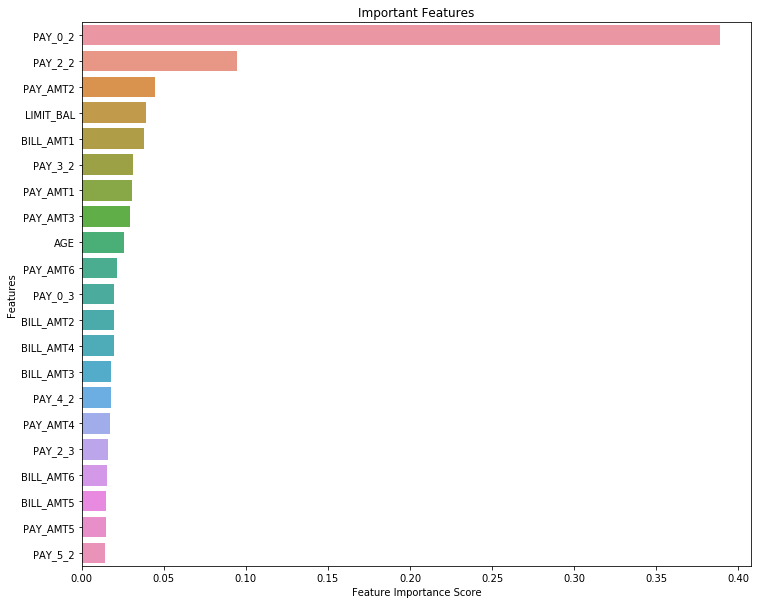

In [86]:
cols=dfd.drop(['ID', 'default payment next month'], axis=1).columns
feature_impgb4 = pd.Series(gb4.feature_importances_,index=cols).sort_values(ascending=False)
plt.figure(figsize=(12,10))
sns.barplot(x=feature_impgb4.iloc[:21], y=feature_impgb4.index[:21])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features");

# Random Forest Classifer

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf4=RandomForestClassifier(max_depth=8,n_estimators=600,criterion='entropy',bootstrap=True,random_state = 0)
rf4.fit(Xd_train, yd_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### RF >>>> Predicting the Test set results

In [88]:
#Probability of Class 1
y_pred_prob4 = np.round(rf4.predict_proba(Xd_test)[:, 1], 2)
#Predicting the Class 1
y_predrf4 = np.where(rf4.predict_proba(Xd_test)[:, 1]>=0.5, 1.0, 0.0)

### RF >>>> Displaying the result

In [89]:
Result_rf4=pd.DataFrame()
Result_rf4['Actual Class'] = pd.Series(y_test)
Result_rf4['Predicted Class'] = pd.Series(y_predrf4)
Result_rf4['Probability of Class 1'] = pd.Series(y_predrf0)
Result_rf4

,Actual Class,Predicted Class,Probability of Class 1
0,1,0.0,0.34
1,0,0.0,0.15
2,0,0.0,0.17
3,0,0.0,0.12
4,0,0.0,0.11
5,0,0.0,0.11
6,0,0.0,0.15
7,0,0.0,0.13
8,1,0.0,0.21
9,0,0.0,0.07


### RF >>>> Evaluating Model Performance

In [90]:
print(f'Confusion Matrix: \n {confusion_matrix(yd_test, y_predrf4)}')  
print(f'Classification Report:\n {classification_report(yd_test,y_predrf4)}')
print(f'Precision: {precision_score(yd_test, y_predrf4)}')  
print(f'Recall: {recall_score(yd_test, y_predrf4)}') 
print(f'Accuracy: {accuracy_score(yd_test, y_predrf4)}') 

Confusion Matrix: 
 [[5676  199]
 [1110  515]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      5875
           1       0.72      0.32      0.44      1625

    accuracy                           0.83      7500
   macro avg       0.78      0.64      0.67      7500
weighted avg       0.81      0.83      0.80      7500

Precision: 0.7212885154061625
Recall: 0.3169230769230769
Accuracy: 0.8254666666666667


### RF >>>> Feature Importance

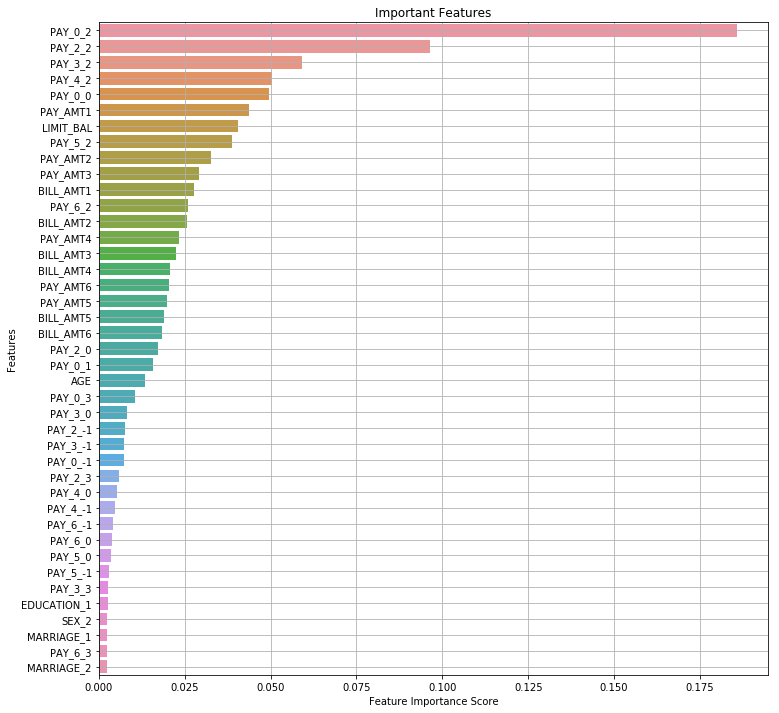

In [91]:
cols=dfd.drop(['ID', 'default payment next month'], axis=1).columns
feature_imprf4 = pd.Series(rf4.feature_importances_,index=cols).sort_values(ascending=False)
plt.figure(figsize=(12,12))
sns.barplot(x=feature_imprf4.iloc[:41], y=feature_imprf4.index[:41])
plt.grid()
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features");

Now let's the performace of TensorFlow

# Tensorflow Classfier

In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
tf.__version__

'2.0.0'

In [93]:
Xd.shape

(30000, 82)

In [94]:
TF4 = Sequential()
#23 feature inputs Going into a 164-unit layer
TF4.add(Dense(units=164, activation='relu', kernel_initializer='normal', input_shape=(Xd_train.shape[1], )))
TF4.add(Dropout(0.5)) #Adding a Dropout layer
# Another hidden layer of 82 units
TF4.add(Dense(units=82, activation='relu', kernel_initializer='normal'))
TF4.add(Dropout(0.5)) #Adding a Dropout layer
# Another hidden layer of 41 units
TF4.add(Dense(units=41, activation='relu', kernel_initializer='normal'))
TF4.add(Dropout(0.5)) #Adding a Dropout layer
# Another hidden layer of 20 units
TF4.add(Dense(units=20, activation='relu', kernel_initializer='normal'))
TF4.add(Dropout(0.5)) #Adding a Dropout layer
TF4.add(Dense(units=10, activation='relu', kernel_initializer='normal'))
TF4.add(Dropout(0.5)) #Adding a Dropout layer
# Output layer with a binary classification (Default Payment Next Month Yes or No)
TF4.add(Dense(units=1, activation='sigmoid'))
#Compiling model
TF4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  
TF4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 164)               13612     
_________________________________________________________________
dropout (Dropout)            (None, 164)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 82)                13530     
_________________________________________________________________
dropout_1 (Dropout)          (None, 82)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 41)                3403      
_________________________________________________________________
dropout_2 (Dropout)          (None, 41)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)               

### Adding Earlystopping

In [95]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) #25
# early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=25)

In [96]:
TF4.fit(x=Xd_train, y=yd_train, batch_size=128, epochs=600, validation_data=(Xd_test, yd_test), verbose=1, callbacks=[early_stop])

Train on 22500 samples, validate on 7500 samples
Epoch 1/600
22500/22500 [==============================] - 2s 79us/sample - loss: 0.5337 - accuracy: 0.7760 - val_loss: 0.4416 - val_accuracy: 0.7833
Epoch 2/600
22500/22500 [==============================] - 1s 32us/sample - loss: 0.4851 - accuracy: 0.7831 - val_loss: 0.4351 - val_accuracy: 0.8200
Epoch 3/600
22500/22500 [==============================] - 1s 32us/sample - loss: 0.4794 - accuracy: 0.7880 - val_loss: 0.4362 - val_accuracy: 0.8240
Epoch 4/600
22500/22500 [==============================] - 1s 32us/sample - loss: 0.4731 - accuracy: 0.7917 - val_loss: 0.4436 - val_accuracy: 0.8256
Epoch 5/600
22500/22500 [==============================] - 1s 32us/sample - loss: 0.4706 - accuracy: 0.7925 - val_loss: 0.4333 - val_accuracy: 0.8260
Epoch 6/600
22500/22500 [==============================] - 1s 32us/sample - loss: 0.4714 - accuracy: 0.7923 - val_loss: 0.4369 - val_accuracy: 0.8261
Epoch 7/600
22500/22500 [==========================

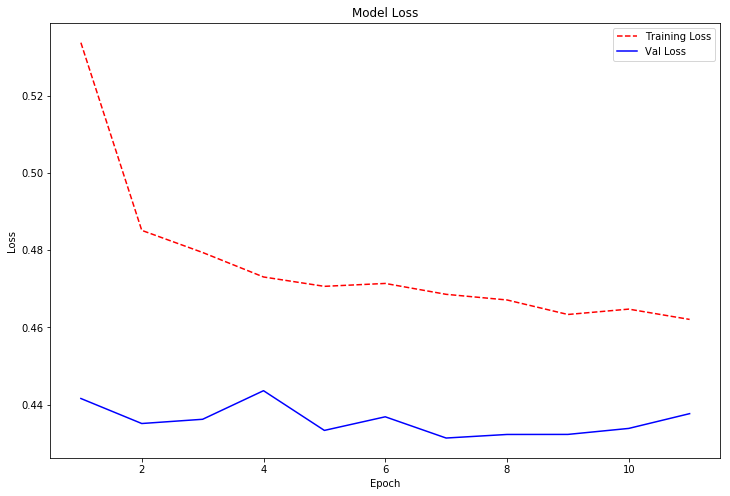

In [97]:
model_loss = pd.DataFrame(TF4.history.history)
epocx = range(1, len( model_loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epocx, model_loss['loss'], 'r--', epocx, model_loss['val_loss'],'b-'); #model_loss[['loss','val_loss']]
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss');

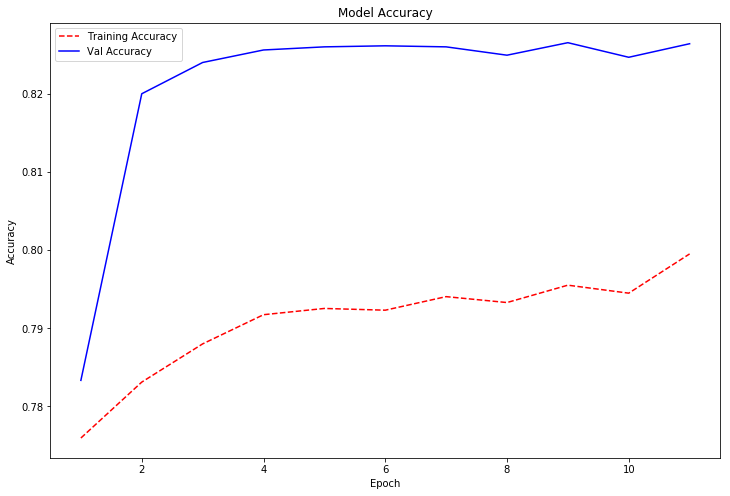

In [98]:
plt.figure(figsize=(12,8))
#plt.plot(model_loss[['accuracy', 'val_accuracy']]);  #.plot()
plt.plot(epocx, model_loss['accuracy'], 'r--', epocx, model_loss['val_accuracy'],'b-')
plt.legend(['Training Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy');

### TF >>>> Predict the response for test dataset

In [99]:
#Probability of Class 1
y_predtf4 = np.round(TF4.predict(Xd_test),2)
#Predicting the Class 1
y_predtf04=np.where(y_predtf4>=0.5,1.0,0.0)

### Displaying the result

In [100]:
Result_tf4=pd.DataFrame()
Result_tf4['Actual Class'] = pd.Series(yd_test)
Result_tf4['Predicted Class'] = pd.Series(y_predtf04[:,0])
Result_tf4['Probability of Class 1'] = pd.Series(y_predtf4[:,0])
Result_tf4

,Actual Class,Predicted Class,Probability of Class 1
0,1,0.0,0.35
1,0,0.0,0.15
2,0,0.0,0.23
3,0,0.0,0.18
4,0,0.0,0.17
5,0,0.0,0.19
6,0,0.0,0.19
7,0,0.0,0.19
8,1,0.0,0.27
9,0,0.0,0.08


### TF >>> Evaluating Model Performance

In [101]:
print(f'Confusion Matrix: \n {confusion_matrix(yd_test, y_predtf04)}')  
print(f'Classification Report:\n {classification_report(yd_test,y_predtf04)}')
print(f'Precision: {precision_score(yd_test, y_predtf04)}')  
print(f'Recall: {recall_score(y_test, y_predtf04)}') 
print(f'Accuracy: {accuracy_score(yd_test, y_predtf04)}') 

Confusion Matrix: 
 [[5603  272]
 [1028  597]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.90      5875
           1       0.69      0.37      0.48      1625

    accuracy                           0.83      7500
   macro avg       0.77      0.66      0.69      7500
weighted avg       0.81      0.83      0.81      7500

Precision: 0.6869965477560415
Recall: 0.36738461538461537
Accuracy: 0.8266666666666667


For the probability threshold value of 0.50 to classify Class 1, the model accuracy is around 83%. The probability that it corectly classifies a new record is 0.69, and therefore 0.3 of making an error. As we mentioned earlier, we belive that this can be improved by tuning the model hyperparameters.

# Model Saving and Loading for Future Deployment 

One can also save and load for future deployment in order to make prediction on new data set.

### <> Random Forest, Gradient Boosting and Extreme Gradient Boosting

### Saving model

In [ ]:
import pickle
model_filename ='../Models/My_Classifier_v1.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump((sc, Classifier), file)

### Loading model

In [ ]:
model_filename ='../Models/My_Classifier_v1.pkl'
with open(model_filename, 'rb') as file:
    sc, Classifier = pickle.load(file)
#Transforming model
Xio = sc.transform(Xi)
# Probability of Class 1 using a new data set, X_test
y_pred = np.round(Classifier.predict_proba(X_test)[:, 1], 3)
#Predicting the Class 1 using probability threshold value of 0.5
y_predc=np.where(y_pred>=0.5,1.0,0.0)

### <> TensorFlow

### Saving model

In [ ]:
tf_nameh5 ='../Models/My_TF_Model.h5'
TF.save(tf_nameh5) #Where TF is a Classifier using TensorFlow

###  Loading model

In [ ]:
tf_nameh5 ='../Models/My_TF_Model.h5'
TF = tf.keras.models.load_model(tf_nameh5)
#Probability of Class 1 for a new data set X_new and standardized data, Xio: 
y_predtf = TF.predict(Xio)
#Predicting Class 1 using probability threshold value of 0.5
y_predtf04=np.where(y_predtf>=0.5,1.0,0.0)

## Summary

In this work, I tried to estimate the probability default for the credit card users. I used machine learning and deep learning algorithms (Random Forest, Gradient Boosting, Extreme Gradient Boosting, SMV(not shown here), KNN(not shown here)  and TensorFlow) to estimate the probability of default users. I followed different approaches to develop the model. The first is without defining the categorical variables (Sex, Education, Marriage, PAY_) and the second one is after defining them. I have also utilized the top 10 best predictors to develop the model and see if this improves the performance of the model.

The models seem to have around 83% prediction accuracy for probability threshold value of 0.5 to class default; however, differences were observed on precision and recall. The models show higher precision for the threshold value used above. The choice of threshold value depends on business requirements. The precision-recall curve shows the tradeoff between precision and recall for different threshold. While high precision relates to a low false positive rate, high recall relates to a low false negative rate. Even though it is not significant, TensorFlow shows a better performance in all of the metrics. It slightly seems to have a better performance after defining the categorical features. This is expected since deep leaning algorithms generally perform better for high dimensional data and defining categorical variables leads to quadruple the number of predictors and hence the deep learning algorithm (TensorFlow) will performance.

Even though I obtained model accuracy of 83%, one can still improve the performance of the model via tuning the Grid Search to get the best model hyperparameters. In fact, this requires high performance computer to iterate through all combinations of the hyperparameters and get the best hyperparameters. Furthermore, utilizing Feature Importance and using, let’s say, the top 8-15 best features will improve model performance. This will reduce the dimension of the data and this particularly good for machine learning algorithms. In fact, getting more data, besides of the using the techniques, will improve the performance of the model as it gives more scenarios for algorithms to learn from. 
